## Python code 

#### Multilayer perceptron (mlp) trained with standard backward propagation on Rice type classification dataset

#### The aim of this project is to implement and compare standard backward propagation algorithm in both Matlab and Python and to train a single hidden-layer perceptron on the Rice classification dataset. This is the python implementation. 


#### The dataset used is a rice classifcation dataset obtained from kaggle https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

In [1270]:
#Importing nessesary libraries


import time , timeit
#Allows to work with time and measuring code execution time
import seaborn as sns
#Visualisation library
import numpy as np
#Package for arrays and matrices and mathematical functions
import matplotlib.pyplot as plt
#Creating visualisations
import pandas as pd
#Allows to load dataset 
import itertools
#For combing elements
import torch
#Neural netowrk relates package
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.autograd import Variable
#Neural netowrk relates package
import random
#Generates random numbers
from sklearn.model_selection import train_test_split
#Function used to split datasets into train and test
from sklearn.preprocessing import MinMaxScaler
#For normalisation
from scipy.stats import boxcox
#Computes Box-Cox transformation


In [1271]:
 #Reproduciblity using the random module 
random.seed(11111)  
#Setting random seed for pytorch library
torch.manual_seed(11111) 

In [1272]:
#Loading the data into a Pandas data frame called 'data'
data = pd.read_csv("riceClassification.csv")

In [1273]:
#Printing data types for the variables in the dataset to gain insight into structure and characterstics
data.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [1274]:
#Converting all the variables into float for consistency. Also float is more precise and is preffered for activation functions and normalisation later on.
data = data.astype('float64')
data.dtypes


id                 float64
Area               float64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class              float64
dtype: object

In [1275]:
#Displaying the data
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1.0,4537.0,92.229316,64.012769,0.719916,4677.0,76.004525,0.657536,273.085,0.764510,1.440796,1.0
1,2.0,2872.0,74.691881,51.400454,0.725553,3015.0,60.471018,0.713009,208.317,0.831658,1.453137,1.0
2,3.0,3048.0,76.293164,52.043491,0.731211,3132.0,62.296341,0.759153,210.012,0.868434,1.465950,1.0
3,4.0,3073.0,77.033628,51.928487,0.738639,3157.0,62.551300,0.783529,210.657,0.870203,1.483456,1.0
4,5.0,3693.0,85.124785,56.374021,0.749282,3802.0,68.571668,0.769375,230.332,0.874743,1.510000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181.0,5853.0,148.624571,51.029281,0.939210,6008.0,86.326537,0.498594,332.960,0.663444,2.912535,0.0
18181,18182.0,7585.0,169.593996,58.141659,0.939398,7806.0,98.272692,0.647461,385.506,0.641362,2.916910,0.0
18182,18183.0,6365.0,154.777085,52.908085,0.939760,6531.0,90.023162,0.561287,342.253,0.682832,2.925396,0.0
18183,18184.0,5960.0,151.397924,51.474600,0.940427,6189.0,87.112041,0.492399,343.371,0.635227,2.941216,0.0


There are 12 columns and 18185 entries of data. 

In [1276]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


The range of values from the table above varies significantly among different variables, normalisation will be useful in this instance and will prevent feature dominance when training. Furthermore 'Area' and 'ConvexArea' are greatly dispersed this can be seen by the high standard deviation.  

### Data Preprocessing

In [1277]:
#Checking for missing values 
print('Missing values \n', data.isnull().sum())

Missing values 
 id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


There is no missing values 

In [1278]:
#Creating 2 lists one which includes all the features of the dataset and the other which contains the target variable
features = data.drop(columns=['id', 'Class'])

# Extract the target variable
target = data['Class']


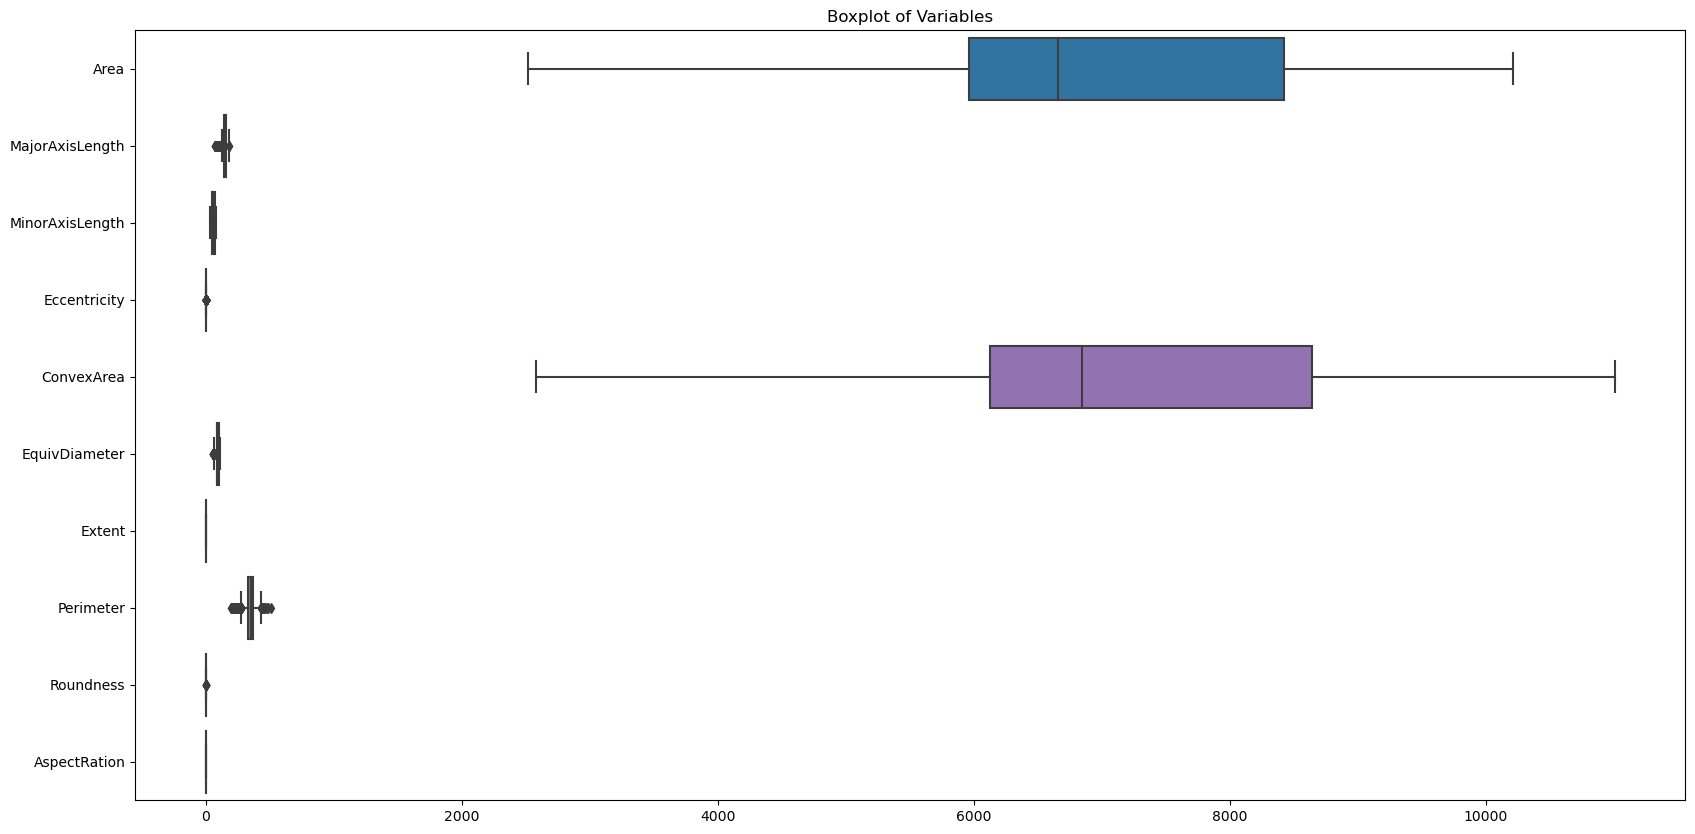

In [1279]:
#Visualising distribution and outliers
plt.figure(figsize=(20, 10))
sns.boxplot(features, orient='h') 
plt.title('Boxplot of Variables')
plt.show()

In [1280]:
#Outlier detection

variable_thresholds = {'Area':3.5,'MajorAxisLength': 6,'MinorAxisLength': 3.5,'Eccentricity': 3.5,'ConvexArea': 3.5,'EquivDiameter': 3.5,'Extent': 3.5,'Perimeter': 3.5,'Roundness': 3.5,'AspectRation': 3.5}
#Setting a threshold score which will be used to view the outliers

outliers = {}
#Empty list to store outliers 
for var, threshold in variable_thresholds.items():
    #For loop to loop through every outlier 
    z_scores = (data[var] - np.mean(data[var])) / np.std(data[var])
    #Obtaining Z score
    outliers[var] = data[np.abs(z_scores) > threshold]

for var, outlier_data in outliers.items():
    print(f"Outliers for '{var}':")
    print(outlier_data)
    #For every variable with an outlier it will be printed





Outliers for 'Area':
Empty DataFrame
Columns: [id, Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation, Class]
Index: []
Outliers for 'MajorAxisLength':
      id    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
1    2.0  2872.0        74.691881        51.400454      0.725553      3015.0   
2    3.0  3048.0        76.293164        52.043491      0.731211      3132.0   
3    4.0  3073.0        77.033628        51.928487      0.738639      3157.0   
5    6.0  2990.0        77.417073        50.954344      0.752861      3080.0   
8    9.0  2629.0        74.133114        48.074144      0.761228      2790.0   
10  11.0  2665.0        74.364021        48.053188      0.763178      2777.0   
12  13.0  2805.0        77.047682        49.242678      0.769107      2950.0   
24  25.0  2647.0        76.789043        45.529112      0.805268      2710.0   
48  49.0  2522.0        77.090790        42.871879     

/var/folders/qx/yygks_tn4_32lm3xlq53x1pc0000gn/T/ipykernel_70683/1177796231.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


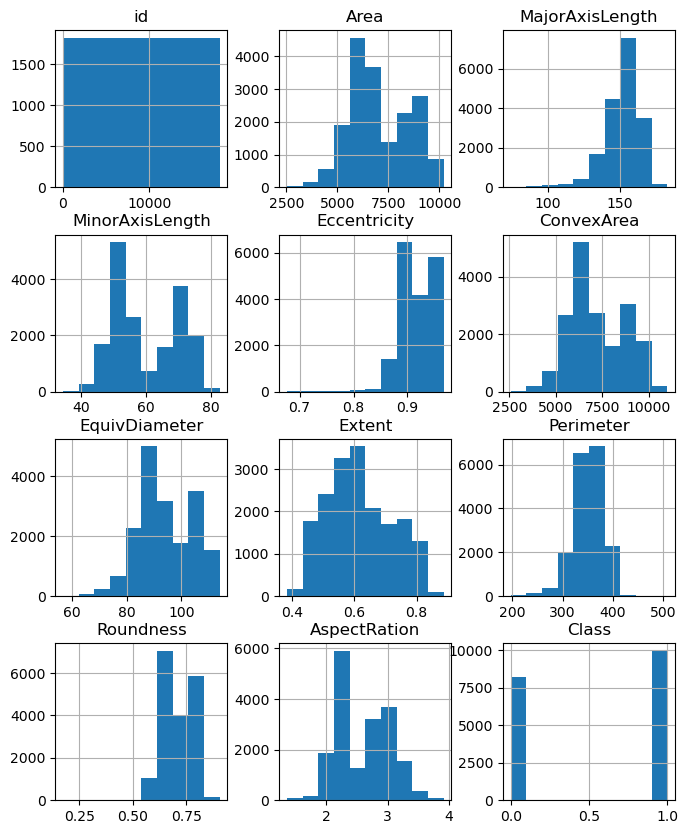

In [1281]:
#Creating histograms 
fig, ax = plt.subplots(figsize=(8, 10))
#This line of code creates figure and axes using matplotlib, the figure size has also been set
data.hist(ax=ax)
#This line plots histogram for each variable in the pandas dataframe
plt.show()

In [1282]:
#Obtaining the different classes (target variable)
rice_types = data['Class'].unique()
rice_types

array([1., 0.])

The two classes within the data is '0' and '1' corresponding to Jasmine and Gonen

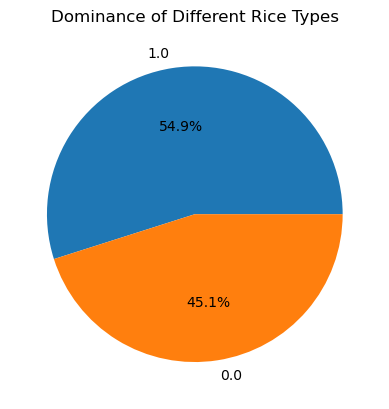

In [1283]:
# Plotting the pie chart to visualise class dominance
plt.pie(data['Class'].value_counts(), labels=data['Class'].value_counts().index, autopct='%1.1f%%')
plt.title('Dominance of Different Rice Types')
plt.show()


In [1284]:
print("Class 1 is",54.9/45.1,'Greater than class 0')

Class 1 is 1.2172949002217295 Greater than class 0


In [1285]:
#Creating an list to store column variables which normalisation and box-cox will be applied
numerical_features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 
                      'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 
                      'Roundness', 'AspectRation']

In [1286]:
# Creating a copy of the data called 'rice_data' to alter the data 
rice_data = data.copy()

In [1287]:
#Min-Max scaling 
#Reference [1]: https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

# Apply Min-Max scaling to each column
for column in numerical_features:
    rice_data[column] = (rice_data[column] - rice_data[column].min()) / (rice_data[column].max() - rice_data[column].min())

# Display the normalized data
rice_data


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1.0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1.0
1,2.0,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1.0
2,3.0,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1.0
3,4.0,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1.0
4,5.0,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181.0,0.433273,0.682917,0.345224,0.904994,0.406810,0.517174,0.229182,0.436426,0.669518,0.608684,0.0
18181,18182.0,0.658559,0.875159,0.492965,0.905642,0.620121,0.725477,0.524943,0.605115,0.639275,0.610397,0.0
18182,18183.0,0.499870,0.739322,0.384251,0.906891,0.468858,0.581631,0.353738,0.466260,0.696071,0.613720,0.0
18183,18184.0,0.447190,0.708342,0.354474,0.909189,0.428283,0.530871,0.216874,0.469849,0.630873,0.619915,0.0


In [1288]:
#Box_cox transformation
for column in numerical_features:
    rice_data[column], _ = boxcox(rice_data[column]+1 )  
# Adding 1 to handle zero values

# Display the transformed data
rice_data





,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1.0,0.235349,0.259672,0.435717,0.217844,0.222958,0.333659,0.420235,0.336502,1.284722,0.031770,1.0
1,2.0,0.044613,0.005193,0.284538,0.258711,0.050468,0.066187,0.484165,0.038100,1.496068,0.036412,1.0
2,3.0,0.066386,0.020880,0.293216,0.303331,0.063601,0.097841,0.533692,0.044134,1.617841,0.041205,1.0
3,4.0,0.069445,0.028553,0.291672,0.367790,0.066385,0.102258,0.558653,0.046453,1.623808,0.047710,1.0
4,5.0,0.142725,0.132184,0.348702,0.472917,0.135744,0.206193,0.544256,0.123383,1.639166,0.057479,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181.0,0.366141,4.119855,0.279475,7.963067,0.342959,0.509272,0.202987,0.762580,0.992950,0.456196,0.0
18181,18182.0,0.518217,8.334792,0.369987,7.979798,0.485772,0.710730,0.408056,1.287912,0.933339,0.457175,0.0
18182,18183.0,0.413229,5.114251,0.304697,8.012104,0.386560,0.571805,0.295663,0.844273,1.046502,0.459071,0.0
18183,18184.0,0.376143,4.546493,0.285545,8.071838,0.358257,0.522575,0.193241,0.854409,0.917037,0.462594,0.0


### Neural Network

In [1289]:
#Splitting the data 

# Extract feature columns (excluding 'Class' and 'id') and target column ('Class')
X = rice_data.drop(columns=['Class', 'id']).values  
#Removing 'Class' and 'ID' from features column 
y = rice_data['Class'].values  
# the target column will only contain 'Class'


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the data into training and testing sets with a 70-30 ratio holdout 

X_train = torch.tensor(X_train, dtype=torch.float32)  
y_train = torch.tensor(y_train, dtype=torch.float32)  
# Convert numpy arrays to Pytorch tensor (as floats)


X_test = torch.tensor(X_test, dtype=torch.float32) 
y_test = torch.tensor(y_test, dtype=torch.float32)  
# Convert numpy arrays to Pytorch tensor (as floats)

#Displaying the shape of the new splitted datasets
print("Shape of X_train:", X_train.shape) 
print("Shape of y_train:", y_train.shape)  
print("Shape of X_test:", X_test.shape)    
print("Shape of y_test:", y_test.shape)    




Shape of X_train: torch.Size([12729, 10])
Shape of y_train: torch.Size([12729])
Shape of X_test: torch.Size([5456, 10])
Shape of y_test: torch.Size([5456])


In [1290]:
#Reproduciblity using the random module 
random.seed(11111)  
#Setting random seed for pytorch library
torch.manual_seed(11111) 


In [1291]:
#Reference [3]: Lab2 Jupyter notebook
#Defining the neural netowork
class RiceNN(nn.Module):
#Using Pytorch to define RiceNN as the neural network
    def __init__(self, hidden_size):
    #Defining the method to create the neural network and takes 'hidden size' which represents number of neurons
        super(RiceNN, self).__init__()
        #Ensures nessesary initialisation is done for the neural network
        self.fc1 = nn.Linear(10, hidden_size)  
        # First layer is created; input size is 10 (number of features), hidden_size is the number of neurons in the hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  
        # Second layer is created: hidden size is the input layer and 1 is the output
        self.sigmoid = nn.Sigmoid()
        #Sigmoid activation function 

    def forward(self, x):
    #Defining the forward pass, and defined how 'x' should propagate 
        hidden = self.fc1(x)
        #Output of the first layer (hidden layer) is computed. Linear transformation is applied on 'x'
        hidden = self.sigmoid(hidden)
        #Sigoid activation function to the first layer
        output = self.fc2(hidden)
        #Output of the second layer (output layer) and linear transformation is applied to hidden layer's output 
        output = self.sigmoid(output) 
        # sigmoid to the output
        return output
        #Final output 



In [1292]:
#Defining the hyperparameters

learning_rates = [0.01, 0.1, 0.3]
#list of different learning rates that will be tested
hidden_sizes = [10, 20, 30]
#List of different hidden number of neurons that will be tested
num_epochs = 10
#Number of iterations 


In [1293]:
#list to store test accuracies and training times for different hyper parameter combinations
test_accuracies = []
training_times = []

In [1294]:
#Model training along hyperparameter
#Nested for loop
for lr in learning_rates:
#Using For loop to loop over the learning rates 
    for hidden_size in hidden_sizes:
        # Within a for loop use another for loop, to loop over different number of neurons this creates hyperparameter combination
        #Reference [3]: Lab2 JPYN
        model = RiceNN(hidden_size)

        # Defining the loss function and optimizer
        criterion = torch.nn.BCEWithLogitsLoss()  
        # Binary Cross Entropy Losssince this is a binary classification task
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)  
        # Stochastic Gradient Descent optimizer set to be used to train the neural network

        # Start measuring training time
        start_time = time.time()

        # Training the model for set number of epochs which was set to 10
        #Reference [3]: Lab2 JPYN
        for epoch in range(num_epochs):
        #For loop to loop over epochs (iterations)
            outputs = model(X_train)
            #Forward pass - predicts outputs 
            loss = criterion(outputs.squeeze(), y_train)
            #Calculates loss which is the difference between predicted outputs and target values

            optimizer.zero_grad()
            #Gradients are cleared of optimized parameters and also to prevent gradient accumulation 
            loss.backward()
            #Calculates gradients loss (using backpropagation)
            optimizer.step()
            #Updates model parameters from computed gradients and chosen optimization algorithm 

            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
            #Print current epoch number and corresponding loss value 

        # Measure training time
        
        end_time = time.time()
        #Notes the end time (Time till training is complete)
        training_time = end_time - start_time
        #Computes training time 
        training_times.append(training_time)
        #Training times are added to a list for every hyperparameter combination
        
        #Model Evaluation 
        model.eval()
        #setting to evaluation 
        with torch.no_grad():
        #Disabling gradient calculation 
            y_pred_probs = model(X_test)
            #Probability on test set
            y_pred = (y_pred_probs >= 0.5).float()
          
            accuracy = (y_pred == y_test).float().mean()
            #Calculate mean accuracy by comparing predicted to test values
            test_accuracies.append(accuracy.item())
            #Accuracies are stored in the list 

            print(f'Learning Rate: {lr}, Hidden Size: {hidden_size}, Test Accuracy: {accuracy.item()}, Training Time: {training_time} seconds')

            #Learning rate, hidden size (number of neurons), test accuracy and training times are printed



Epoch [1/10], Loss: 0.7082937955856323
Epoch [2/10], Loss: 0.7082595825195312
Epoch [3/10], Loss: 0.7082253694534302
Epoch [4/10], Loss: 0.7081912755966187
Epoch [5/10], Loss: 0.7081571221351624
Epoch [6/10], Loss: 0.7081227898597717
Epoch [7/10], Loss: 0.7080888152122498
Epoch [8/10], Loss: 0.7080546617507935
Epoch [9/10], Loss: 0.7080205678939819
Epoch [10/10], Loss: 0.7079864740371704
Learning Rate: 0.01, Hidden Size: 10, Test Accuracy: 0.5515029430389404, Training Time: 0.1756291389465332 seconds
Epoch [1/10], Loss: 0.7059923410415649
Epoch [2/10], Loss: 0.7059476375579834
Epoch [3/10], Loss: 0.7059031128883362
Epoch [4/10], Loss: 0.7058584094047546
Epoch [5/10], Loss: 0.7058139443397522
Epoch [6/10], Loss: 0.7057693600654602
Epoch [7/10], Loss: 0.7057249546051025
Epoch [8/10], Loss: 0.7056805491447449
Epoch [9/10], Loss: 0.705636203289032
Epoch [10/10], Loss: 0.7055918574333191
Learning Rate: 0.01, Hidden Size: 20, Test Accuracy: 0.5515029430389404, Training Time: 0.10247397422790

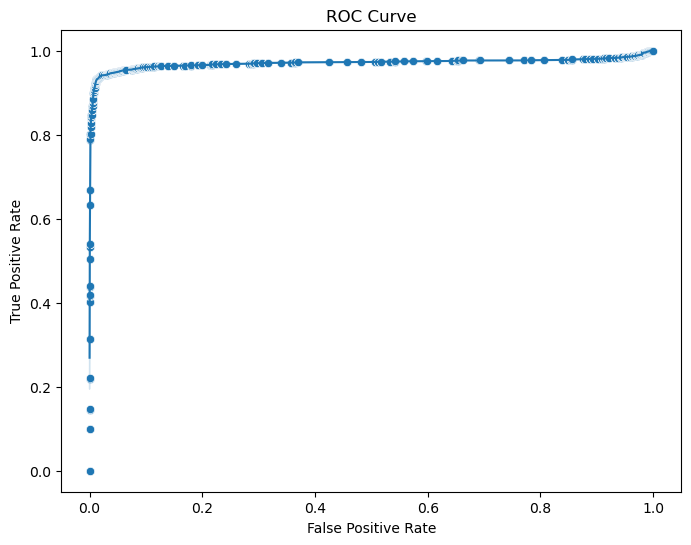

0.9708054694382999

In [1295]:
#ROC curve
#Reference [4]: https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
#True postive and false positive rates are calculated

auc = roc_auc_score(y_test, y_pred_probs)
#Area under the curve is calculated

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fpr, y=tpr)  
sns.lineplot(x=fpr, y=tpr)      
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

auc
#Display area under the curve

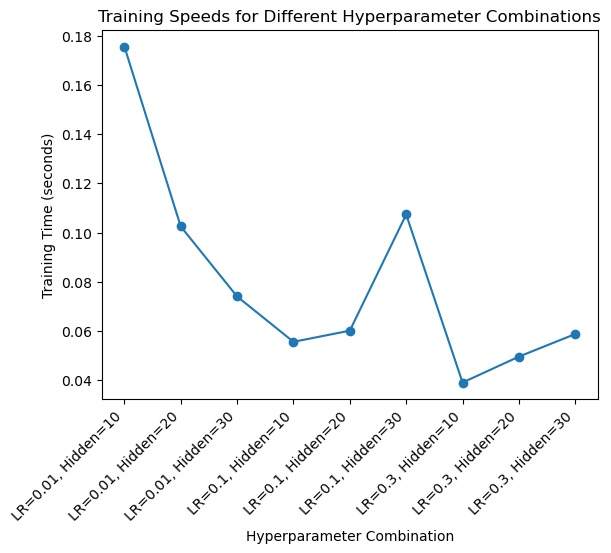

In [1296]:
#Training times
#Reference: https://stackoverflow.com/questions/3034014/how-to-apply-itertools-product-to-elements-of-a-list-of-lists
# Create a list of all hyperparameter combinations using the itertool module
hyperparameter_combinations = list(itertools.product(learning_rates, hidden_sizes))

plt.plot(training_times,marker='o')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Training Time (seconds)')
plt.title('Training Speeds for Different Hyperparameter Combinations')
plt.xticks(range(len(hyperparameter_combinations)), [f'LR={lr}, Hidden={hidden}' for lr, hidden in hyperparameter_combinations], rotation=45, ha='right')
#Each 'X' value is is set and corresponding hyper paramaters are stated

plt.show()


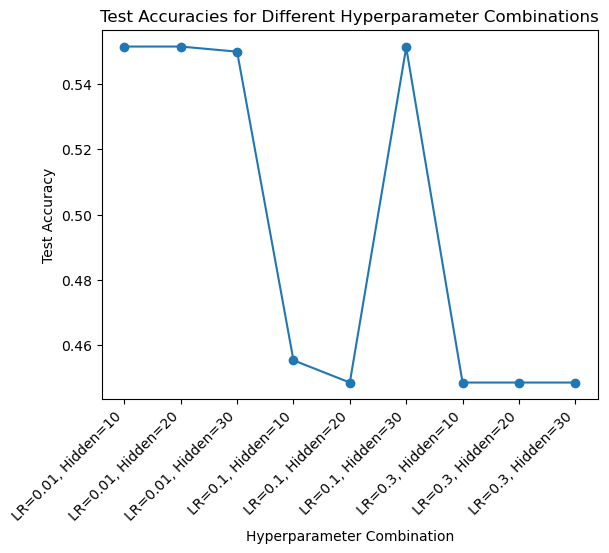

In [1297]:
#test accuracies

plt.plot(test_accuracies, marker='o')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for Different Hyperparameter Combinations')
plt.xticks(range(len(hyperparameter_combinations)), [f'LR={lr}, Hidden={hidden}' for lr, hidden in hyperparameter_combinations], rotation=45, ha='right')
#Each 'X' value is is set and corresponding hyper paramaters are stated
plt.show()

In [1298]:
#References;
#[1]: “Normalize A Column In Pandas,” GeeksforGeeks, Dec. 09, 2020. https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
#[2]: “Chart visualization — pandas 2.2.1 documentation,” pandas.pydata.org. https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-radviz (accessed Mar. 01, 2024).
#[3]: Neural Networks Lab 2 jpyn
#[4]: V. Trevisan, “Interpreting ROC Curve and ROC AUC for Classification Evaluation,” Medium, Mar. 25, 2022. https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077
